# Usage Instructions - Persistent Disk Storage Forecasting

Persistent disk storage forecasting helps businesses assess their local disk storage utilization based on the historic usage pattern. This will provide businesses an understanding of their disk storage attached to their virtual machines which will help them manage their infrastructure better. It uses ensemble ML algorithms with automatic model selection algorithms. This solution provides consistent and better results due to its ensemble learning approach. This solution performs automated model selection to apply the right model based on the input data. 

## Contents

1. Prequisites
1. Data Dictionary
1. Import Libraries
1. Sample Input Data
1. Create Model
1. Create Future Data
1. Predict Future Datapoints
1. Plot the DataFrame
1. Saving Forcast

### Prerequisites

To run this algorithm you need to have install following packages:
- "pandas" to read/save csv files.
- "pystan==2.19.1.1"
- "prophet" to forcast data.



### Data Dictionary

- The input has to be a '.csv' file with 'utf-8' encoding. PLEASE NOTE: If your input .csv file is not 'utf-8' encoded, model   will not perform as expected
1. Have an unique identifier column called 'maskedsku'. eg. 'maskedsku' can be shipmentid
2. The date format of the columns should be: 'YYYY-MM-DD'

## Import Libraries

In [1]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Sample input data

In [3]:
# read the sample csv
df = pd.read_csv("sample_disk_space (1).csv")
# Pivot the data
df = df.T.reset_index()
# 
df = df.drop(index = [0],axis = 0)
# naming is required as per prophet conditions.
df = df.rename(mapper = {'index':'ds',0:'y'},axis = 1)
df

,ds,y
1,2018-08-01 12:00,13380.82192
2,2018-08-01 13:00,15244.93151
3,2018-08-01 14:00,14925.20548
4,2018-08-01 15:00,13585.9726
5,2018-08-01 16:00,11365.47945
6,2018-08-01 17:00,20060.54795
7,2018-08-01 18:00,12861.36986
8,2018-08-01 19:00,14945.2274
9,2018-08-01 20:00,14490.37808
10,2018-08-01 21:00,12208.53699


## Create Model

Now we use the Model Package to create a model

In [4]:

m = Prophet()
m.fit(df.iloc[1:,:])

# Python


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Create the future data

The prophet instance used to create future data.

In [5]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
59,2018-08-28 22:00:00
60,2018-08-29 22:00:00
61,2018-08-30 22:00:00
62,2018-08-31 22:00:00
63,2018-09-01 22:00:00


# Predict Future datapoints

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
59,2018-08-28 22:00:00,53873.099534,50122.284871,57785.665865
60,2018-08-29 22:00:00,55309.212078,51337.608564,58959.690434
61,2018-08-30 22:00:00,56745.324621,52739.498501,60611.819781
62,2018-08-31 22:00:00,58181.437165,54469.640077,62276.715141
63,2018-09-01 22:00:00,59617.549709,55571.222289,63115.902431


## Plot the forecast dataframe

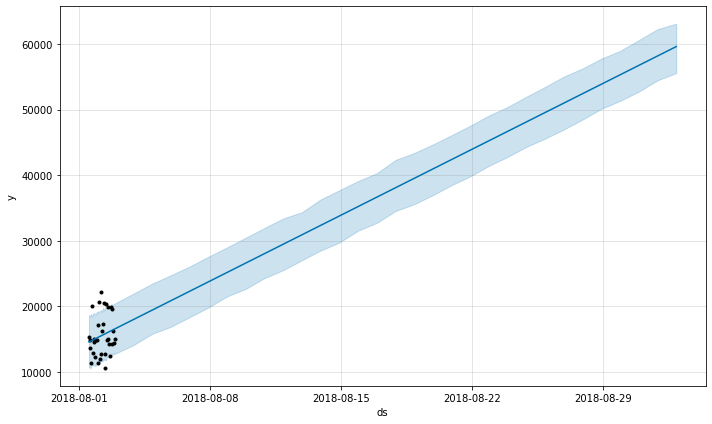

In [7]:
# Python
fig1 = m.plot(forecast)

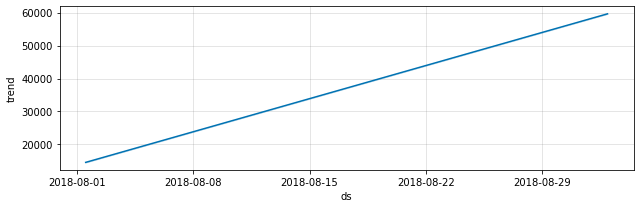

In [8]:
# Python
fig2 = m.plot_components(forecast)

## Saving Forecast

In [11]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.to_csv('sample_disk_result.csv',index=False)

In [10]:
forecast

,ds,yhat,yhat_lower,yhat_upper
0,2018-08-01 13:00:00,14559.518636,10660.129044,18650.372395
1,2018-08-01 14:00:00,14619.356659,10681.177008,18400.000960
2,2018-08-01 15:00:00,14679.194682,10496.168691,18653.586437
3,2018-08-01 16:00:00,14739.032705,10812.250155,18800.181847
4,2018-08-01 17:00:00,14798.870728,11037.342870,18364.050541
...,...,...,...,...
59,2018-08-28 22:00:00,53873.099534,50122.284871,57785.665865
60,2018-08-29 22:00:00,55309.212078,51337.608564,58959.690434
61,2018-08-30 22:00:00,56745.324621,52739.498501,60611.819781
62,2018-08-31 22:00:00,58181.437165,54469.640077,62276.715141
